In [1]:
import pandas as pd


df = pd.DataFrame({"A":[1,2,3,4,5], "B":[6,7,8,9,10]})
df["A"]>3

0    False
1    False
2    False
3     True
4     True
Name: A, dtype: bool

1. Precision（適合率） - 予測したクラス（例：setosa, versicolor, virginica）において、どれだけ正確だったかを示します。例えば、setosaと予測されたものの中で、実際にsetosaであった割合です。
2. Recall（再現率） - 実際のクラスにおいて、どれだけ正確に予測できたかを示します。例えば、実際のsetosaの中で、どれだけ正確にsetosaと予測されたかです。
3. F1-Score（F1スコア） - PrecisionとRecallの調和平均です。バランスの取れた指標で、高いほど良い性能を示します。
4. Support（サポート） - 各クラスのサンプル数です。この例では、setosaが19個、versicolorが13個、virginicaが13個です。

In [3]:
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split


# アイリスデータセットの読み込み
iris = load_iris()
X = iris.data
y = iris.target

# 訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ランダムフォレスト分類器の訓練
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# テストデータに対する予測
y_pred = clf.predict(X_test)

# 分類レポートの表示
print(classification_report(y_test, y_pred, target_names=iris.target_names))


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



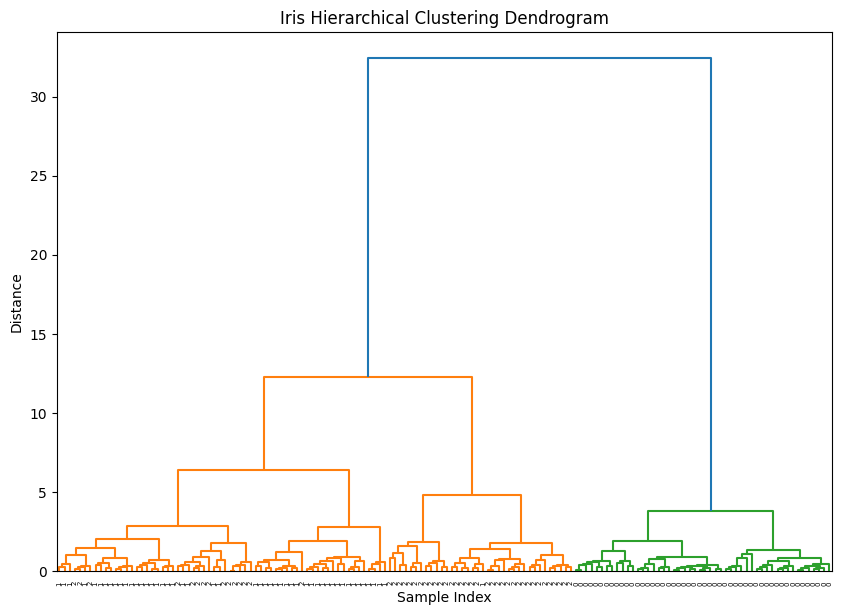

In [5]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np


# アイリスデータセットの読み込み
iris = load_iris()
X = iris.data

# 階層的クラスタリングの実施（ここではWard法を使用）
linked = linkage(X, method='ward')

# 樹形図（デンドログラム）の作成
plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           labels=np.array(iris.target),
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Iris Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


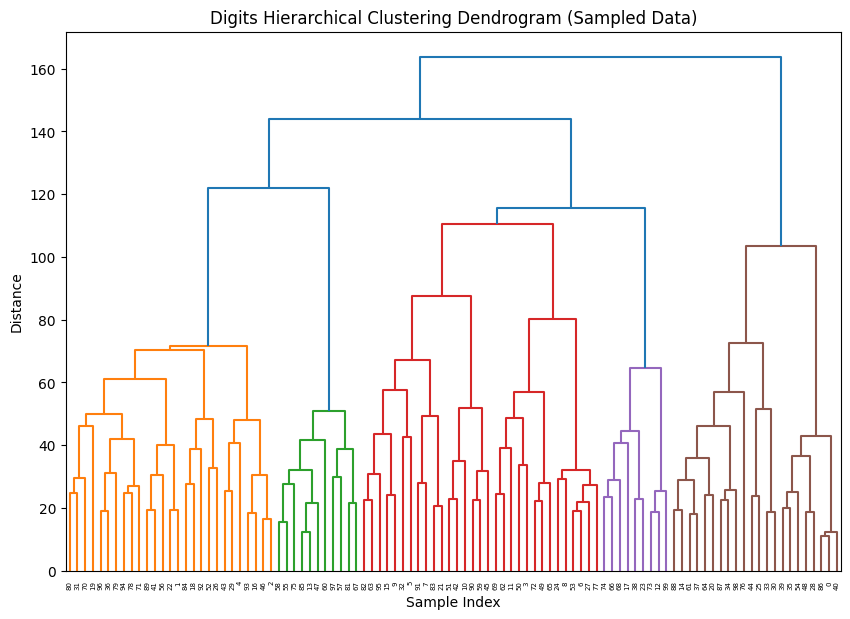

In [6]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import load_digits
import numpy as np

# 手書き数字データセットの読み込み（データサイズが大きい例）
digits = load_digits()
X = digits.data

# データのサンプリング：ランダムにデータを選択
np.random.seed(42) # 結果の再現性のため
indices = np.random.choice(range(len(X)), size=100, replace=False) # 100個のサンプルをランダムに選択
# NumPyのファンシーインデックス
X_sampled = X[indices]

# 階層的クラスタリングの実施（ここではWard法を使用）
linked = linkage(X_sampled, method='ward')

# 樹形図（デンドログラム）の作成
plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Digits Hierarchical Clustering Dendrogram (Sampled Data)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


## データサイエンティストに求められる能力についての問題ですね。正解は「案件を獲得するための営業能力」でしたが、この選択肢が正解である理由を説明しましょう。

1. プログラミング能力: データサイエンティストにはデータの処理や分析を行うためのプログラミング能力が必須です。PythonやRなどの言語を使ってデータを扱う能力は、データサイエンスの基礎となります。

2. アルゴリズム構築に必要な数理的能力: データサイエンティストは、データを分析し、予測モデルを構築するために数学的な知識が必要です。統計学、確率論、線形代数などの数理的な背景は、データサイエンスのアルゴリズムを理解し適用する上で重要です。

3. 顧客へわかりやすく分析結果を伝えるためのレポーティング能力: 分析の結果を非専門家にも理解できるように伝える能力は、データサイエンティストにとって非常に重要です。データの洞察をビジネスの意思決定に役立てるためには、分析結果をわかりやすく伝えることが必須です。

- 対照的に、案件を獲得するための営業能力は、データサイエンティストの主要な役割ではありません。営業能力は、ビジネス開発や顧客関係の管理に関わる職種でより重要視されるスキルです。データサイエンティストは主にデータ分析、モデリング、洞察の抽出に焦点を当てるため、直接的な営業活動は彼らの主要な業務範囲外となります。

- 以上の点から、データサイエンティストには「案件を獲得するための営業能力」が必須ではないという選択肢が正しいとされています。プログラミング、数理的能力、レポーティング能力は、データサイエンティストの基本的なスキルセットとして不可欠ですが、営業能力はそうではありません。

In [7]:
import numpy as np


A = np.array([[0, 1, 2, 3, 4]])
# 1行5列の配列を作り、すべての要素を 1 で埋めることを意味します。
B = np.full((1, 5), 1) # B = [[1 1 1 1 1]]

# [[False, True, True, True, True]]のTrue結果のみ反映する
A[A>=B]

array([1, 2, 3, 4])

In [8]:
import pandas as pd

# 画像から読み取ったデータに基づいてDataFrameを作成
data = {
    'Date': ['2000/3/27', '2000/3/28', '2000/3/29', '2000/3/30', '2000/3/31'],
    '始値': [19976.14063, 20273.67969, 20406.56055, 20706.44922, 20371.07031],
    '終値': [20281.02930, 20374.33984, 20706.65039, 20441.50000, 20337.32031]
}

df = pd.DataFrame(data)

# Date列をdatetimeオブジェクトに変換
df['Date'] = pd.to_datetime(df['Date'])

# 変換されたDataFrameとデータ型を表示
print(df)
print(df.dtypes)


        Date           始値           終値
0 2000-03-27  19976.14063  20281.02930
1 2000-03-28  20273.67969  20374.33984
2 2000-03-29  20406.56055  20706.65039
3 2000-03-30  20706.44922  20441.50000
4 2000-03-31  20371.07031  20337.32031
Date    datetime64[ns]
始値             float64
終値             float64
dtype: object


## 行列計算
- 行列Aの最初の行 [1 2] と行列Bの最初の列 [5 7] をそれぞれ掛け合わせます。つまり：

- 1行1列の位置にある数：1 * 5 + 2 * 7 = 5 + 14 = 19
- 1行2列の位置にある数：1 * 6 + 2 * 8 = 6 + 16 = 22
- 次に、行列Aの2行目 [3 4] と行列Bの各列を掛け合わせます。

- 2行1列の位置にある数：3 * 5 + 4 * 7 = 15 + 28 = 43
- 2行2列の位置にある数：3 * 6 + 4 * 8 = 18 + 32 = 50


In [9]:
import numpy as np

# 行列Aと行列Bを定義
A = np.array([[1, 2],
              [3, 4]])

B = np.array([[5, 6],
              [7, 8]])

# 行列の掛け算（行列積を計算）
C = np.dot(A, B)

# 結果の行列Cを表示
print(C)


[[19 22]
 [43 50]]


In [11]:
import numpy as np

# 行列Aと行列Bを定義
A = np.array([[1,0],
              [0,1]])

B = np.array([[1, 0],
              [0, 1]])

# 行列の掛け算（行列積を計算）
C = np.dot(A, B)

# 結果の行列Cを表示
print(C)


[[1 0]
 [0 1]]


In [12]:
import pandas as pd
import numpy as np

# 画像から読み取ったデータに基づいてDataFrameを作成
data = {
    'ユーザーID': [0, 1, 2, 3, 4],
    '利用回数': [79.0, 78.0, 33.0, 55.0, 52.0],
    '利用料金': [4667.0, 5041.0, 8631.0, 8750.0, np.nan],
    '性別': ['男性', '男性', '女性', '女性', '男性'],
    '職種/部署': ['販売', '独身', '販売', '販売', '販売']
}

df = pd.DataFrame(data)

# 例：NaNを持つ行を削除する
df_cleaned = df.dropna()

# 例：利用回数が50以上の行をフィルタリングする
df_filtered = df[df['利用回数'] >= 50]

# 例：性別でグループ化し、各グループの平均利用料金を計算する
df_grouped = df.groupby('性別')['利用料金'].mean()

# 例：一回あたりの平均利用料金を新しい列として計算する
df['平均利用料金'] = df['利用料金'] / df['利用回数']

# 結果を表示
print(df_cleaned)
print(df_filtered)
print(df_grouped)
print(df)


   ユーザーID  利用回数    利用料金  性別 職種/部署
0       0  79.0  4667.0  男性    販売
1       1  78.0  5041.0  男性    独身
2       2  33.0  8631.0  女性    販売
3       3  55.0  8750.0  女性    販売
   ユーザーID  利用回数    利用料金  性別 職種/部署
0       0  79.0  4667.0  男性    販売
1       1  78.0  5041.0  男性    独身
3       3  55.0  8750.0  女性    販売
4       4  52.0     NaN  男性    販売
性別
女性    8690.5
男性    4854.0
Name: 利用料金, dtype: float64
   ユーザーID  利用回数    利用料金  性別 職種/部署      平均利用料金
0       0  79.0  4667.0  男性    販売   59.075949
1       1  78.0  5041.0  男性    独身   64.628205
2       2  33.0  8631.0  女性    販売  261.545455
3       3  55.0  8750.0  女性    販売  159.090909
4       4  52.0     NaN  男性    販売         NaN


/Users/kimuratoshiyuki/opt/anaconda3/envs/py311/lib/python3.11/site-packages/japanize_matplotlib/japanize_matplotlib.py:16: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  is_support_createFontList = LooseVersion(matplotlib.__version__) < '3.2'
/Users/kimuratoshiyuki/opt/anaconda3/envs/py311/lib/python3.11/site-packages/setuptools/_distutils/version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


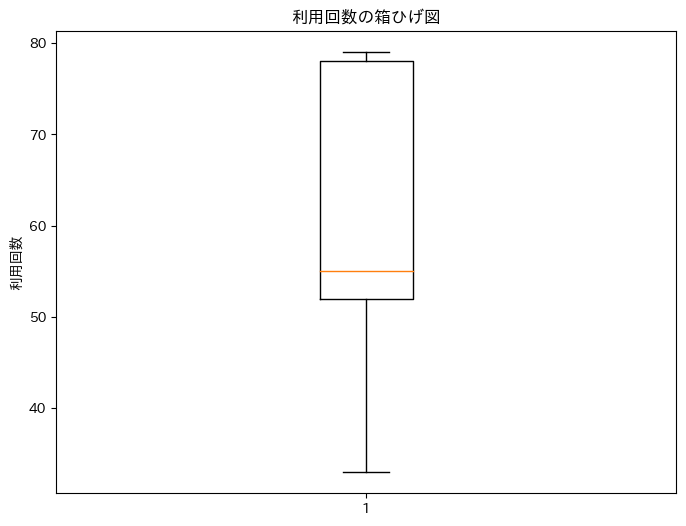

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
%matplotlib inline

# 画像から読み取ったデータに基づいてDataFrameを作成
data = {
    'ユーザーID': [0, 1, 2, 3, 4],
    '利用回数': [79.0, 78.0, 33.0, 55.0, 52.0],
    '利用料金': [4667.0, 5041.0, 8631.0, 8750.0, np.nan],
    '性別': ['男性', '男性', '女性', '女性', '男性'],
    '職種/部署': ['販売', '独身', '販売', '販売', '販売']
}

df = pd.DataFrame(data)

# 利用回数の箱ひげ図を描画
plt.figure(figsize=(8, 6))  # 箱ひげ図のサイズを指定
plt.boxplot(df['利用回数'].dropna())  # NaNを除外して箱ひげ図を描画
plt.title('利用回数の箱ひげ図')  # タイトルを付ける
plt.ylabel('利用回数')  # y軸のラベルを付ける
plt.show()  # 描画した箱ひげ図を表示


In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
%timeit

# データセットの生成（サンプル用）
X, y = make_classification(n_samples=1000, n_features=4,
                           n_informative=2, n_redundant=0,
                           random_state=0, shuffle=False)

# RandomForestClassifierのインスタンスを生成し、max_depthを指定
clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)

# モデルの訓練
%timeit clf.fit(X, y)

# モデルを使った予測
predictions = clf.predict(X)

# 結果の表示（最初の10個の予測を表示）
print(predictions[:20])


467 ms ± 8.23 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [4]:
# この例では、sum(range(100))を1000回実行し、そのうちの最速の5回の平均実行時間を計測します。
%timeit -n 1000 -r 5 sum(range(100))

4.1 µs ± 424 ns per loop (mean ± std. dev. of 5 runs, 1,000 loops each)


In [6]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %conda  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# データの生成
x = np.random.rand(50)  # 0から1までのランダムな50個の数値
y = np.random.rand(50)  # 同じくランダムな50個の数値

# 散布図の描画
plt.scatter(x, y)
plt.title('Sample Scatter Plot')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


In [6]:
s = 'DIVE INTO CODE'
result = s.lower()
print(type(result))
print(result)  # 出力: "dive into code"


<class 'str'>
dive into code


In [7]:
s = 'DIVE INTO CODE'
result = s.split()
print(type(result))
print(result)  # 出力: ['DIVE', 'INTO', 'CODE']


<class 'list'>
['DIVE', 'INTO', 'CODE']


In [13]:
s = 'DIVE INTO CODE'
result = s.strip()
print(type(result))
print(result)  # 出力: "DIVE INTO CODE"

s_2 = ' DIVE INTO! CODE '
# 先頭と末尾から半角スペースを取り除く
result = s_2.strip(' ')
print(type(result))
print(result)  # 出力: "DIVE INTO CODE"

<class 'str'>
DIVE INTO CODE
<class 'str'>
DIVE INTO! CODE


In [10]:
s = 'DIVE INTO CODE'
result = s.replace('CODE', 'Python')
print(result)  # 出力: "DIVE INTO Python"


DIVE INTO Python


In [14]:
import numpy as np

A = np.eye(3)
B = np.count_nonzero(A)
C = np.sum(A)
print(f'A: {A}')
print(f'B: {B}')
print(f'C: {C}')

A: [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
B: 3
C: 3.0


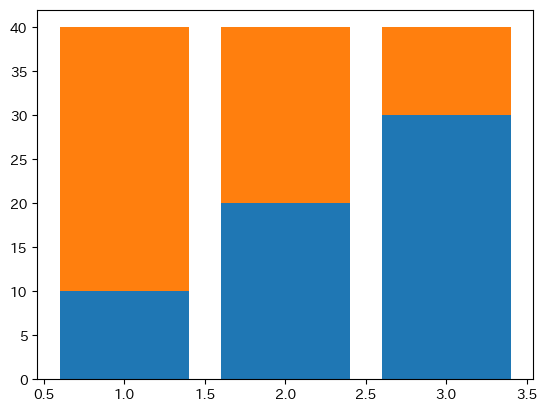

In [15]:
fig, ax = plt.subplots()

x = [1,2,3]
y1 = [10, 20, 30]
y2 = [30, 20, 10]

ax.bar(x, y1)
# 最初の棒グラフの上に積み上げる
ax.bar(x, y2, bottom=y1)
plt.show()

In [16]:
import numpy as np

A = np.eye(4)
print(A)
# np.hsplit 関数は、配列を水平方向（横）に分割します。
first, second = np.hsplit(A, [2])
print(first)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
[[1. 0.]
 [0. 1.]
 [0. 0.]
 [0. 0.]]


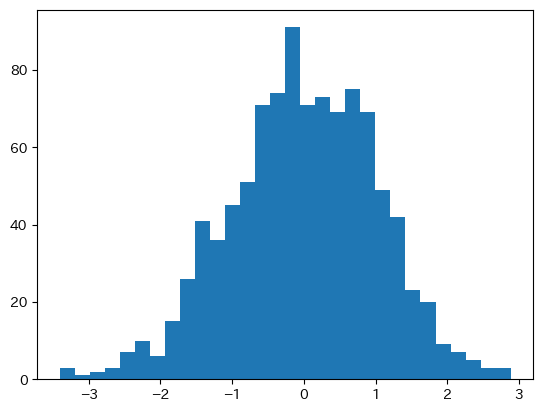

(array([ 3.,  1.,  2.,  3.,  7., 10.,  6., 15., 26., 41., 36., 45., 51.,
        71., 74., 91., 71., 73., 69., 75., 69., 49., 42., 23., 20.,  9.,
         7.,  5.,  3.,  3.]),
 array([-3.40350807, -3.19391408, -2.9843201 , -2.77472611, -2.56513213,
        -2.35553814, -2.14594415, -1.93635017, -1.72675618, -1.5171622 ,
        -1.30756821, -1.09797423, -0.88838024, -0.67878625, -0.46919227,
        -0.25959828, -0.0500043 ,  0.15958969,  0.36918367,  0.57877766,
         0.78837164,  0.99796563,  1.20755962,  1.4171536 ,  1.62674759,
         1.83634157,  2.04593556,  2.25552954,  2.46512353,  2.67471751,
         2.8843115 ]),
 <BarContainer object of 30 artists>)

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Generating random data
data = np.random.randn(1000)

# Using the hist() method and capturing its return values
n, bins, patches = plt.hist(data, bins=30)

# Displaying the histogram
plt.show()

# Returning the captured values for explanation
n, bins, patches


## 覚え方の例
- loc: "Location"の "L" は "Label"の "L" を思い出させます。つまり、ラベルで位置を特定します。
- iloc: "Index Location" の "i" は "Integer"（整数）を思い出させます。つまり、整数インデックスで位置を特定します。

In [18]:
import pandas as pd

df = pd.DataFrame({"A":[1,2,3,4,5], "B":[6,7,8,9,10]})
df.iloc[1]>3

A    False
B     True
Name: 1, dtype: bool

In [20]:
df

,A,B
0,1,6
1,2,7
2,3,8
3,4,9
4,5,10


In [19]:
df.iloc[1]

A    2
B    7
Name: 1, dtype: int64

In [23]:
import numpy as np

A = np.array([[0, 1, 2, 3, 4]])
print(f'A: {A}')
# 5列の2埋め
B = np.full((1, 5), 2)
print(f'B: {B}')
print(f"result: {np.sum(A>=B)}")

A: [[0 1 2 3 4]]
B: [[2 2 2 2 2]]
result: 3


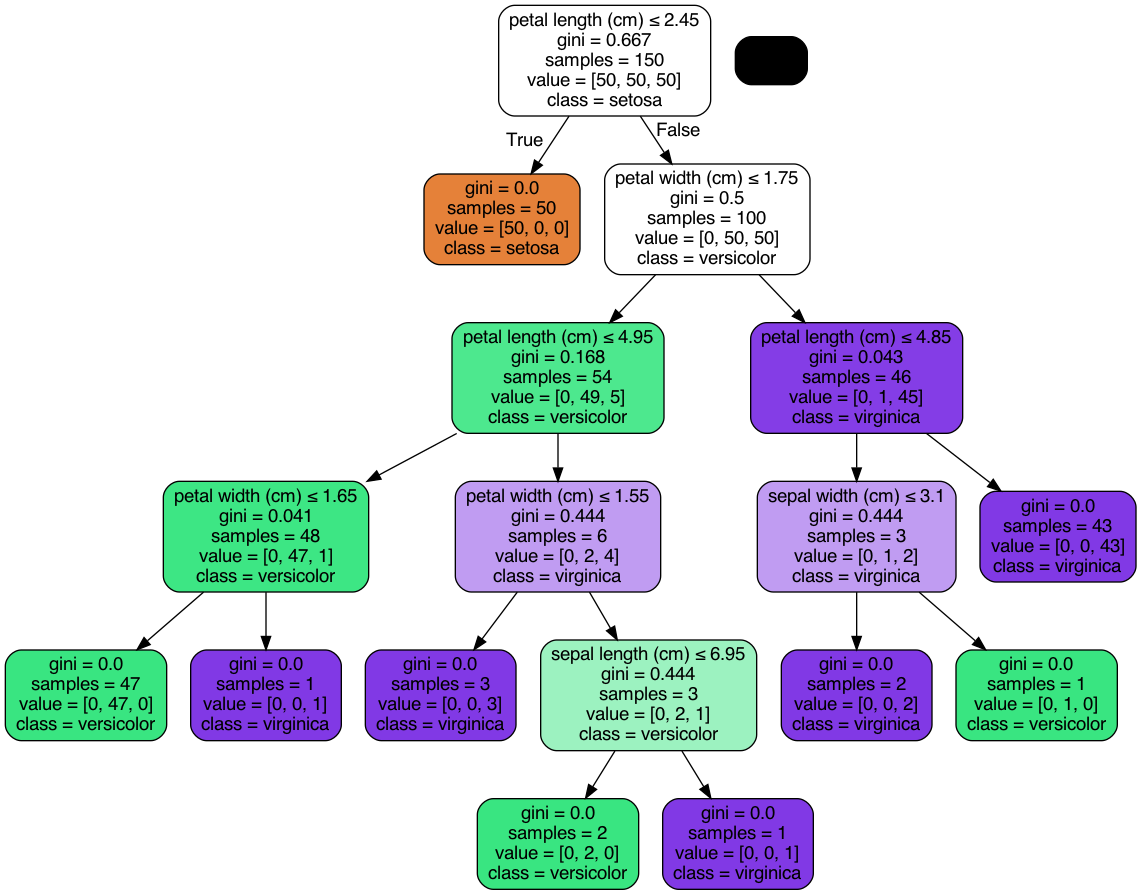

In [95]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from pydotplus import graph_from_dot_data
from IPython.display import Image

# Irisデータセットをロードし、pandas DataFrameに変換
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

# DataFrameから特徴量を選択
X = df

# 決定木モデルの学習
clf = DecisionTreeClassifier()
clf.fit(X, y)

# 決定木のDOTデータを生成
dot_data = export_graphviz(clf, out_file=None, 
                           feature_names=iris.feature_names,  
                           class_names=iris.target_names,
                           filled=True, rounded=True,  
                           special_characters=True)

# pydotplusを使って画像に変換
graph = graph_from_dot_data(dot_data)
Image(graph.create_png())


In [28]:
import pandas as pd

# データを辞書形式で定義
data = {
    '国名': ['日本', 'アメリカ', 'イギリス', 'フランス', 'ロシア', 'ブラジル', 'インドネシア'],
    '人口/万人': [12700, 32800, 6000, 6700, 14500, 20900, 6600]
}

# DataFrameを作成
df = pd.DataFrame(data)

# DataFrameを表示
df


,国名,人口/万人
0,日本,12700
1,アメリカ,32800
2,イギリス,6000
3,フランス,6700
4,ロシア,14500
5,ブラジル,20900
6,インドネシア,6600


In [30]:
# axis=0 は行、axis=1は列
df.drop('人口/万人', axis=1)

,国名
0,日本
1,アメリカ
2,イギリス
3,フランス
4,ロシア
5,ブラジル
6,インドネシア



### ステップ・バイ・ステップの例

例として、関数 `f(x, y) = x^2y^3` を使って、`x` についての微分と偏微分を行います。

1. **微分の基本規則の確認**:
   - 積の微分: `(uv)' = u'v + uv'`
   - 冪の微分: `(x^n)' = nx^(n-1)`

2. **`x` についての微分**:
   - 関数 `f(x) = x^2` を `x` について微分すると `f'(x) = 2x` になります。

3. **`x` についての偏微分**:
   - 関数 `f(x, y) = x^2y^3` において、`y` を定数とみなし、`x` について微分すると、`y^3` は定数扱いされ、`∂/∂x (x^2y^3) = 2xy^3` になります。

4. **`y` についての偏微分**:
   - 同じ関数 `f(x, y)` において、今度は `x` を定数とみなし、`y` について微分すると、`x^2` は定数扱いされ、`∂/∂y (x^2y^3) = 3x^2y^2` になります。


In [33]:
from sympy import symbols, diff

# 変数 x, y を定義
x, y = symbols('x y')

# 関数 f(x, y) を定義
f = x**2 * y**3

# x に関する偏微分
partial_x = diff(f, x)

# y に関する偏微分
partial_y = diff(f, y)

partial_x, partial_y


(2*x*y**3, 3*x**2*y**2)

In [37]:
import numpy as np

# 単位行列を作成
A = np.eye(4)
print(f'A: {A}')
print(f'A[3]: {A[3]}')

# np.vsplitで行列を垂直方向に分割
first, second = np.vsplit(A, [3])
print(f'first: {first}')
print(f'second: {second}')

# secondの転置を取得
second_transposed = second.T

print(f'result: {second_transposed}')


A: [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
A[3]: [0. 0. 0. 1.]
first: [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]
second: [[0. 0. 0. 1.]]
result: [[0.]
 [0.]
 [0.]
 [1.]]


In [38]:
A = [1]*10
A

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [40]:
import pandas as pd

# 画像から読み取ったデータをもとにDataFrameを作成
data = {
    'name of country': ['日本', 'アメリカ', '中国', 'インド'],
    'area': [380000, 9834000, 959700, 301300]
}

# DataFrameを作成
df = pd.DataFrame(data)
df

,name of country,area
0,日本,380000
1,アメリカ,9834000
2,中国,959700
3,インド,301300


In [46]:
print(type(df.iloc[:, 0]))
df.iloc[:, 0]

<class 'pandas.core.series.Series'>


0      日本
1    アメリカ
2      中国
3     インド
Name: name of country, dtype: object

In [48]:
print(type(df['name of country']))
df['name of country']

<class 'pandas.core.series.Series'>


0      日本
1    アメリカ
2      中国
3     インド
Name: name of country, dtype: object

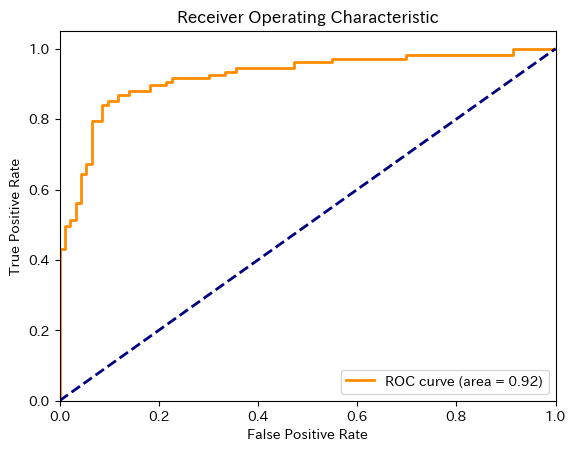

In [49]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# サンプルデータの生成
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# 訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ロジスティック回帰モデルのインスタンス化と学習
model = LogisticRegression()
model.fit(X_train, y_train)

# テストデータに対する予測確率を計算
y_pred_prob = model.predict_proba(X_test)[:, 1]

# ROC曲線の計算
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# ROC曲線のプロット
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [51]:
import numpy as np

A = np.array([[0, 1, 2, 3, 4]])
B = np.full((1, 5), 1)
print(f'B: {B}')
A[A>=B]

B: [[1 1 1 1 1]]


array([1, 2, 3, 4])

## 文字数を計測

In [52]:
# Original text length and the revised text length calculation

original_text = "Python経歴年数は1年以上2年未満。社内でのDX推進活動に携わることになり業務効率化や自動化に役立つとよく聞くプログラミング言語としてPythonを知りました。"
revised_text = "私のPythonに関する経験は、具体的には1年以上2年未満になります。最近、私の勤めている会社でデジタルトランスフォーメーション（DX）の推進活動に取り組む機会があり、その過程で業務効率化や自動化を実現するための強力なツールとしてPythonのプログラミング言語を知ることになりました。私も日々の業務においてその有用性を実感しています。"

original_length = len(original_text)
revised_length = len(revised_text)

original_length, revised_length


(82, 168)

In [53]:
len('非常に満足しています。私が苦手としていた部分が明確に理解できるようになり、どの分野の知識が不足しているかがはっきりと分かるようになりました。特に文法に関する理解が深まったことは大きな成果です。これにより、業務で他の人に教える際にも、より効果的かつ簡潔にポイントを伝えることができるようになり、私の指導能力の向上に大いに役立つと確信しています。このような学習の機会を得られたことに感謝しており、今後もこの知識を活かしていきたいと考えています。')

220

In [54]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


In [55]:
# 必要なライブラリのインポート
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Irisデータセットをロード
iris = load_iris()
X, y = iris.data, iris.target

# トレーニングセットとテストセットに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# DecisionTreeClassifierのインスタンスを作成
# ここではいくつかの引数を設定しています
clf = DecisionTreeClassifier(max_depth=3, criterion='gini', max_leaf_nodes=5)

# モデルのトレーニング
clf.fit(X_train, y_train)

# テストデータでの予測
predictions = clf.predict(X_test)

# 予測結果を表示
print(predictions)


[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]


In [56]:
# 必要なライブラリのインポート
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# テストデータでの予測
predictions = clf.predict(X_test)

# 正確度（Accuracy）の計算
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")

# 適合率（Precision）の計算
precision = precision_score(y_test, predictions, average='macro')
print(f"Precision: {precision:.2f}")

# 再現率（Recall）の計算
recall = recall_score(y_test, predictions, average='macro')
print(f"Recall: {recall:.2f}")

# F1スコアの計算
f1 = f1_score(y_test, predictions, average='macro')
print(f"F1 Score: {f1:.2f}")


Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


Iterations: 10, Average: 5.0
Iterations: 100, Average: 5.6
Iterations: 1000, Average: 5.285
Iterations: 10000, Average: 5.4923


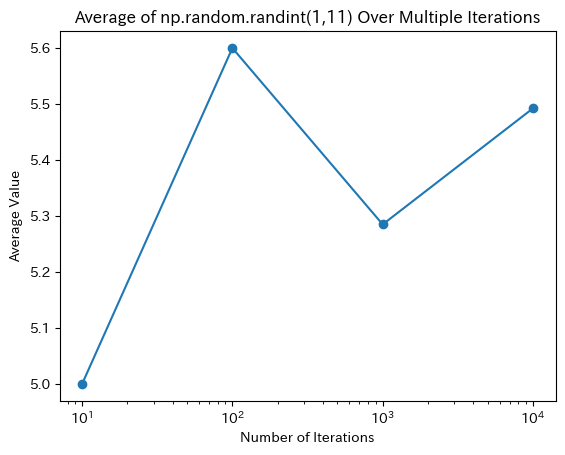

In [57]:
import numpy as np
import matplotlib.pyplot as plt

# 繰り返し回数のリスト（例えば、10回、100回、1000回、10000回）
iterations = [10, 100, 1000, 10000]

# 各繰り返し回数における平均値を格納するためのリスト
averages = []

for i in iterations:
    # np.random.randintを使用してランダムな数を生成し、平均値を計算
    random_numbers = np.random.randint(1, 11, size=i)
    average = np.mean(random_numbers)
    averages.append(average)

    # 現在の繰り返し回数と平均値を出力
    print(f"Iterations: {i}, Average: {average}")

# 結果のグラフを描画
plt.plot(iterations, averages, marker='o')
plt.xlabel('Number of Iterations')
plt.ylabel('Average Value')
plt.title('Average of np.random.randint(1,11) Over Multiple Iterations')
plt.xscale('log')  # X軸を対数スケールに設定
plt.show()


In [59]:
A = np.array([[1,2,3],[4,5,6]])

# 行列Aを1次元配列に変換（平坦化）しています。この操作の結果、Bは[1, 2, 3, 4, 5, 6]という1次元配列になります。
B = A.flatten()
A[1,:]=0

# 6行の1列
B = B.reshape(6,1)
print(B)
B[-1]

[[1]
 [2]
 [3]
 [4]
 [5]
 [6]]


array([6])

In [60]:
import pandas as pd

# データフレームを作成
data = {
    '番号': [0, 1, 2, 3, 4]
}

# 日付をインデックスとして設定
index = pd.date_range('2020-01-01', periods=5, freq='D')

# データフレームの作成
df = pd.DataFrame(data, index=index)

# 結果を表示
print(df)


            番号
2020-01-01   0
2020-01-02   1
2020-01-03   2
2020-01-04   3
2020-01-05   4


In [63]:
import pandas as pd

# データフレームを作成
data = {
    '番号': [0, 1, 2, 3, 4]
}
index = pd.date_range('2020-01-01', periods=5, freq='D')
df = pd.DataFrame(data, index=index)

# 水曜日から始まる週単位で番号の合計を計算
weekly_sums = df.resample('W-WED').sum()

print(weekly_sums)


            番号
2020-01-01   0
2020-01-08  10


In [66]:
import numpy as np

A = np.array([[0, 1, 2, 3, 4]])
B = np.full((1, 5), 2)
print(B)

# Trueになる要素の数を返す
np.sum(A>=B)

[[2 2 2 2 2]]


3

In [67]:
import pandas as pd

# 画像から読み取ったデータをもとにDataFrameを作成します。
data = {
    '日付': ['2000/3/27', '2000/3/28', '2000/3/29', '2000/3/30', '2000/3/31'],
    '始値': [19976.14063, 20273.67969, 20406.56055, 20706.44922, 20371.07031],
    '終値': [20281.02930, 20374.33984, 20706.65039, 20441.50000, 20337.32031]
}

df = pd.DataFrame(data)

# DataFrameを表示します。
print(df)


          日付           始値           終値
0  2000/3/27  19976.14063  20281.02930
1  2000/3/28  20273.67969  20374.33984
2  2000/3/29  20406.56055  20706.65039
3  2000/3/30  20706.44922  20441.50000
4  2000/3/31  20371.07031  20337.32031


In [68]:
def add_rank(value):
    if value >= 1000:
        return "High"
    elif 0 <= value < 1000:
        return "Normal"
    else:
        return "Low"
    
df["増減値"] = df["終値"] - df["始値"]
df["ランク"] = df["増減値"].apply(add_rank)

In [69]:
df

,日付,始値,終値,増減値,ランク
0,2000/3/27,19976.14063,20281.02930,304.88867,Normal
1,2000/3/28,20273.67969,20374.33984,100.66015,Normal
2,2000/3/29,20406.56055,20706.65039,300.08984,Normal
3,2000/3/30,20706.44922,20441.50000,-264.94922,Low
4,2000/3/31,20371.07031,20337.32031,-33.75000,Low


- "vertical stack"の略です。これは、配列を垂直（縦）に積み重ねるために使用されます。

In [70]:
import numpy as np

a = np.array([[0,1,10],[0,1,10]])
b = np.array([100,100,100])
np.vstack([a,b])

array([[  0,   1,  10],
       [  0,   1,  10],
       [100, 100, 100]])

- Aを直接参照しているため、以下のような出力結果となる。

In [73]:
import numpy as np

A = np.array([[1, 2, 3], [4, 5, 6]])
B = A[0, :]
print(f'代入前: {B}')
A[0, :] = 0
print(f'代入後: {B}')  # Bも[0, 0, 0]に変わっていることを確認


代入前: [1 2 3]
代入後: [0 0 0]


In [75]:
import numpy as np

A = np.array([[0, 1, 2, 3, 4]])
B = np.full((1, 5), 1)
print(B)
print(A[A>=B])

[[1 1 1 1 1]]
[1 2 3 4]


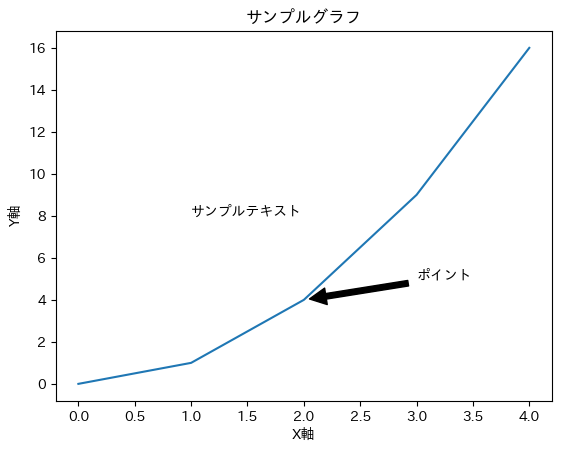

In [76]:
import matplotlib.pyplot as plt

# サンプルデータを作成
x = [0, 1, 2, 3, 4]
y = [0, 1, 4, 9, 16]

plt.figure()
plt.plot(x, y)

# text() メソッドを使用
plt.text(1, 8, "サンプルテキスト")

# annotate() メソッドを使用
plt.annotate('ポイント', xy=(2, 4), xytext=(3, 5),
             arrowprops=dict(facecolor='black', shrink=0.05))

# 軸ラベルとタイトル
plt.xlabel("X軸")
plt.ylabel("Y軸")
plt.title("サンプルグラフ")

plt.show()


In [78]:
import numpy as np

a = np.array([[0,1,10],[0,1,10]])
b = np.array([[100],[100]])
np.hstack((a,b))  # aとbを横方向に結合する


array([[  0,   1,  10, 100],
       [  0,   1,  10, 100]])

In [79]:
# 同様に横方向で結合する
np.concatenate([a,b],axis=1)

array([[  0,   1,  10, 100],
       [  0,   1,  10, 100]])

In [80]:
import pandas as pd

df_1 = pd.DataFrame({'a': [10, 100], 'b': [10, 20], 'c': [10, 1]})
df_2 = pd.DataFrame({'a': [10, 100], 'b': [10, 20], 'c': [10, 1]})


In [81]:
print(df_1)
print(df_2)

     a   b   c
0   10  10  10
1  100  20   1
     a   b   c
0   10  10  10
1  100  20   1


In [82]:
# 行での結合だから以下の結果となる
pd.concat([df_1, df_2], axis=0).reset_index(drop = True)

,a,b,c
0,10,10,10
1,100,20,1
2,10,10,10
3,100,20,1


In [83]:
import numpy as np

A = np.array([[0, 1, 2, 3, 4]])
B = np.full((1, 5), 2)
print(B)
# Aよりも大きい値の個数を返す
np.sum(A>=B)

[[2 2 2 2 2]]


3

/Users/kimuratoshiyuki/opt/anaconda3/envs/py311/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


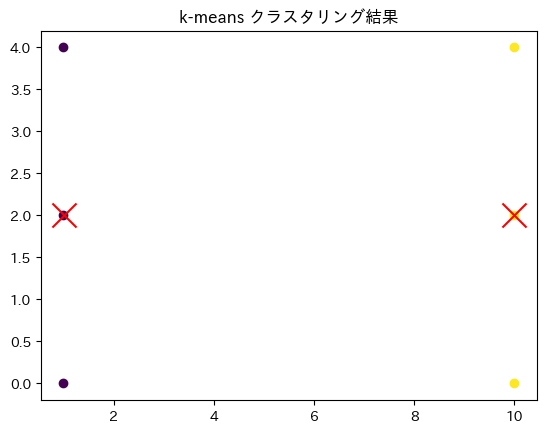

In [84]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

# サンプルデータを生成
X = np.array([[1, 2], [1, 4], [1, 0],
              [10, 2], [10, 4], [10, 0]])

# k-meansクラスタリングを実行
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

# クラスタリング結果をプロット
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='x')
plt.title("k-means クラスタリング結果")
plt.show()


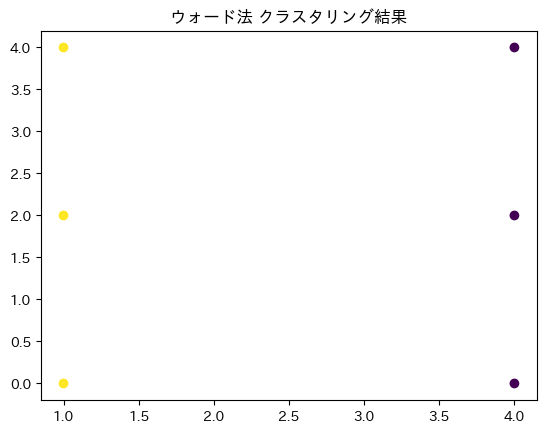

In [85]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import matplotlib.pyplot as plt

# サンプルデータを生成
X = np.array([[1, 2], [1, 4], [1, 0],
              [4, 2], [4, 4], [4, 0]])

# ウォード法を使用したクラスタリング
clustering = AgglomerativeClustering(n_clusters=2, linkage='ward')
clustering.fit(X)

# クラスタリング結果をプロット
plt.scatter(X[:, 0], X[:, 1], c=clustering.labels_, cmap='viridis')
plt.title("ウォード法 クラスタリング結果")
plt.show()


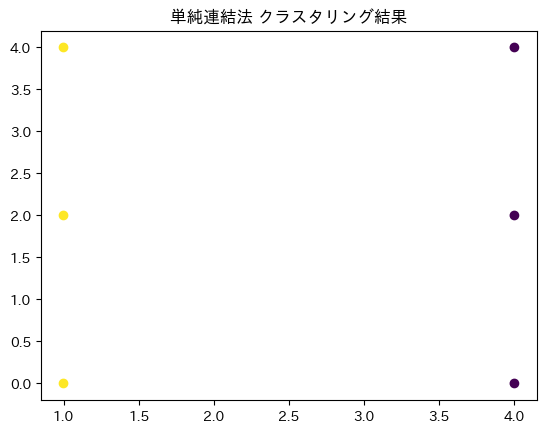

In [86]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import matplotlib.pyplot as plt

# サンプルデータを生成
X = np.array([[1, 2], [1, 4], [1, 0],
              [4, 2], [4, 4], [4, 0]])

# 単純連結法を使用したクラスタリング
clustering = AgglomerativeClustering(n_clusters=2, linkage='single')
clustering.fit(X)

# クラスタリング結果をプロット
plt.scatter(X[:, 0], X[:, 1], c=clustering.labels_, cmap='viridis')
plt.title("単純連結法 クラスタリング結果")
plt.show()


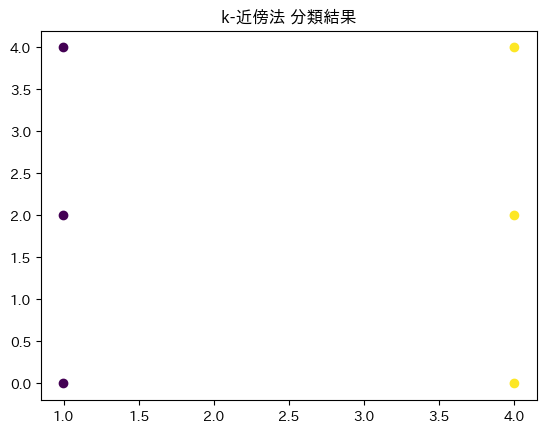

In [87]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt

# サンプルデータとラベルを生成
X = np.array([[1, 2], [1, 4], [1, 0],
              [4, 2], [4, 4], [4, 0]])
y = np.array([0, 0, 0, 1, 1, 1])

# k-近傍法を用いた分類
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)

# 分類結果をプロット
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title("k-近傍法 分類結果")
plt.show()


/Users/kimuratoshiyuki/opt/anaconda3/envs/py311/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


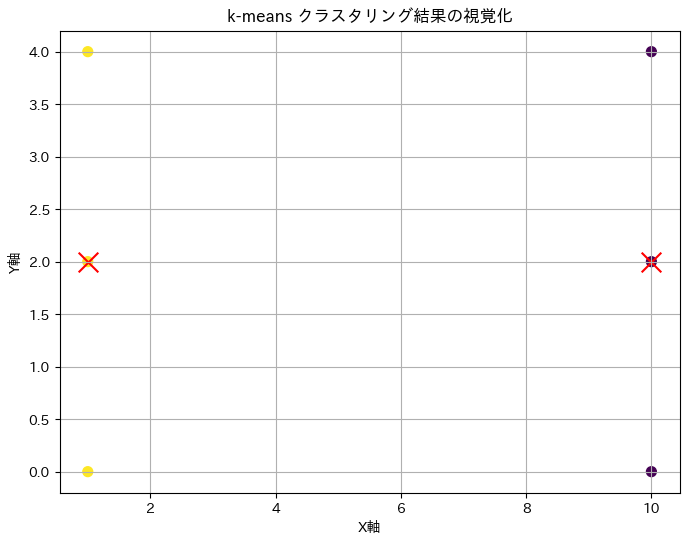

In [88]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

# サンプルデータを生成
X = np.array([[1, 2], [1, 4], [1, 0],
              [10, 2], [10, 4], [10, 0]])

# k-meansクラスタリングを実行
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

# クラスタリング結果をプロット
plt.figure(figsize=(8, 6))  # グラフのサイズを大きくする
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis', s=50)  # データポイントのサイズを大きくする
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='x')  # クラスタの中心点を強調

# 軸のラベルとタイトルを追加
plt.xlabel('X軸')
plt.ylabel('Y軸')
plt.title('k-means クラスタリング結果の視覚化')

plt.grid(True)  # グリッドを表示
plt.show()


/Users/kimuratoshiyuki/opt/anaconda3/envs/py311/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


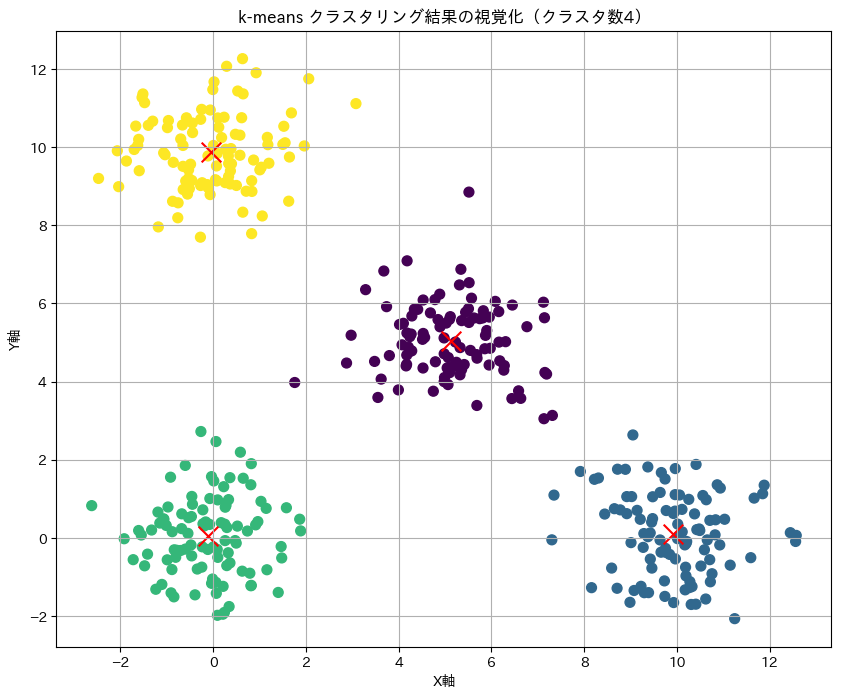

In [89]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

# より大きなサンプルデータをランダムに生成
np.random.seed(42)  # 結果の再現性のため
X1 = np.random.randn(100, 2) + np.array([0, 0])
X2 = np.random.randn(100, 2) + np.array([5, 5])
X3 = np.random.randn(100, 2) + np.array([0, 10])
X4 = np.random.randn(100, 2) + np.array([10, 0])
X = np.vstack((X1, X2, X3, X4))

# k-meansクラスタリングを実行
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

# クラスタリング結果をプロット
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='x')

# 軸のラベルとタイトルを追加
plt.xlabel('X軸')
plt.ylabel('Y軸')
plt.title('k-means クラスタリング結果の視覚化（クラスタ数4）')

plt.grid(True)
plt.show()


In [93]:
np.random.randn(100, 2) + np.array([0, 0])

array([[ 0.07682189, -1.28299222],
       [ 0.99626682, -0.49375658],
       [-1.5565819 , -0.42811516],
       [ 1.50075979,  0.85022174],
       [-0.34865213, -0.3492577 ],
       [-0.32163505,  2.07674798],
       [ 0.38193545,  0.43004165],
       [ 1.03028345,  0.23878916],
       [-0.25904215, -0.19634985],
       [-0.07160126, -0.03722224],
       [ 0.72762954,  0.05194589],
       [ 0.73264008, -0.08071658],
       [ 0.07863519, -1.99820068],
       [ 0.91632767,  0.34648848],
       [ 0.99801011, -2.89625538],
       [ 2.0883747 , -0.13958963],
       [ 1.10818282, -1.03990593],
       [ 0.61277391, -1.05341556],
       [-0.62376896,  1.91403135],
       [-0.1906824 ,  0.21743287],
       [ 0.87006773,  0.49568189],
       [ 0.15041891,  0.364961  ],
       [ 2.40341559, -0.0576188 ],
       [ 0.20109905,  1.0506544 ],
       [ 1.10552593,  1.18703031],
       [ 0.63873022, -1.14300491],
       [ 1.63343153, -1.14634539],
       [ 0.30263547, -0.75427585],
       [-0.06413835,

In [2]:
import numpy as np

# 行列AとBを定義
A = np.array([[2, 2]])
B = np.array([[2], [2]])

# 行列の積を計算
product = np.dot(A, B)
product


array([[8]])

行列の積の計算方法:

行列 \( A \) と \( B \) の積を計算するプロセスは次の通りです。

行列 \( A \):

$$
A = \begin{bmatrix}
4 & 2 \\
2 & 4
\end{bmatrix}
$$

行列 \( B \):

$$
B = \begin{bmatrix}
2 & 4 \\
4 & 2
\end{bmatrix}
$$

これらの行列の積 \( C \) は次のように計算されます：

- \( C \) の (1,1) 要素: \( C_{1,1} = A_{1,1} \times B_{1,1} + A_{1,2} \times B_{2,1} \)
- \( C \) の (1,2) 要素: \( C_{1,2} = A_{1,1} \times B_{1,2} + A_{1,2} \times B_{2,2} \)
- \( C \) の (2,1) 要素: \( C_{2,1} = A_{2,1} \times B_{1,1} + A_{2,2} \times B_{2,1} \)
- \( C \) の (2,2) 要素: \( C_{2,2} = A_{2,1} \times B_{1,2} + A_{2,2} \times B_{2,2} \)

計算結果:

$$
C = \begin{bmatrix}
C_{1,1} & C_{1,2} \\
C_{2,1} & C_{2,2}
\end{bmatrix}
$$

$$
C = \begin{bmatrix}
16 & 20 \\
20 & 16
\end{bmatrix}
$$

この計算により、行列 \( A \) と行列 \( B \) の積は \( C \) となります。


In [3]:
A = np.array([[4,2],
              [2,4]])
B = np.array([[2,4],
              [4,2]])
np.dot(A, B)

array([[16, 20],
       [20, 16]])

In [7]:
import numpy as np

m = np.arange(4)
print(f'm: {m}')
n = np.arange(4)
print(f'n: {n}')
xx, yy = np.meshgrid(m,n)

m: [0 1 2 3]
n: [0 1 2 3]


In [8]:
xx

array([[0, 1, 2, 3],
       [0, 1, 2, 3],
       [0, 1, 2, 3],
       [0, 1, 2, 3]])

In [9]:
yy

array([[0, 0, 0, 0],
       [1, 1, 1, 1],
       [2, 2, 2, 2],
       [3, 3, 3, 3]])

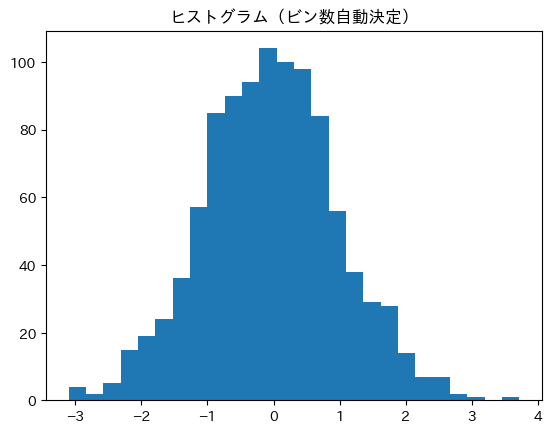

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# サンプルデータの生成
data = np.random.randn(1000)

# ヒストグラムの描画
plt.hist(data, bins='auto')  # 'auto'を指定して最適なビン数を自動決定
plt.title("ヒストグラム（ビン数自動決定）")
plt.show()



In [13]:
A = np.eye(4)
# Aを2列めから2つに分割する
first, second = np.hsplit(A, [2])  
first

array([[1., 0.],
       [0., 1.],
       [0., 0.],
       [0., 0.]])

### 昇順（しょうじゅん）と降順（こうじゅん）を覚えるのは、確かに時々ややこしいですね。面白くて覚えやすい方法を一つ教えましょう。

- 想像してみてください、あなたは山を登っています。山を昇るとき、あなたは下から上へ向かいますよね？これが「昇順」です。数字に置き換えると、小さい数から大きい数へと順番に並べ替えることを意味します。例えば、1, 2, 3, 4, 5 のように。

- 逆に、山を降りる時はどうでしょう？あなたは上から下へ向かいます。これが「降順」のイメージです。数字では、大きい数から小さい数へと並べ替えることを意味します。例えば、5, 4, 3, 2, 1 のようにね。

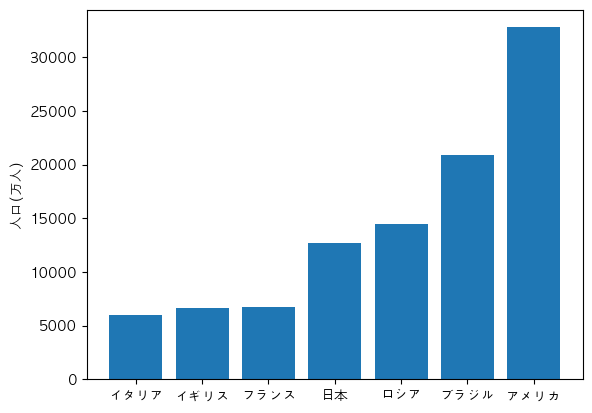

In [16]:
import pandas as pd
import matplotlib.pyplot as plt 

df = pd.DataFrame({"国名":["日本","アメリカ","イタリア","フランス", "ロシア", "ブラジル", "イギリス"], 
                   "人口/万人":[12700, 32800, 6000, 6700, 14500, 20900, 6600]})

df = df.sort_values("人口/万人", )  # 人口/万人の列で昇順に並べ替える
plt.rcParams["font.family"] = "AppleGothic"
plt.bar(df["国名"], df["人口/万人"])
plt.ylabel("人口(万人)")
plt.show()

### 問題解説: ピアソンの相関係数の計算

ピアソンの相関係数 \( r \) は、二つの変数の共分散と、それぞれの標準偏差を用いて計算されます。公式は以下のとおりです：

$$
r = \frac{\text{共分散}}{\text{xの標準偏差} \times \text{yの標準偏差}}
$$

問題文より、次の情報が与えられています：

- \( x \) の標準偏差 = 1
- \( y \) の標準偏差 = 2
- \( x \) と \( y \) の共分散 = 2

これらの値を公式に代入して計算すると：

$$
r = \frac{2}{1 \times 2} = \frac{2}{2} = 1
$$

したがって、求めるピアソンの相関係数は 1 となります。


### 不定積分の解説

不定積分とは、ある関数の原始関数を見つけることを意味します。積分操作によって、微分の逆を行い、どの関数を微分すると与えられた関数が得られるかを探ります。

例えば、次の不定積分を考えます：

$$
\int \frac{1}{x} \, dx
$$

この関数の原始関数は \( \ln|x| \) です。なぜなら、\( \ln|x| \) の微分が \( \frac{1}{x} \) になるからです。したがって、不定積分の答えは次のようになります：

$$
\ln|x| + C
$$

ここで、\( C \) は積分定数であり、微分すると \( 0 \) になる任意の定数です。これは、微分すると定数は消えるため、原始関数には定数項が加わる可能性があることを示しています。


In [ ]:
import numpy as np

a = np.array([[0,1,10],[0,1,10]])
b = a.copy()
a = a.reshape(3,2)
print(f'aの配列: {a}, bの配列: {b}')
np.dot(a,b)

aの配列: [[ 0  1]
 [10  0]
 [ 1 10]], bの配列: [[ 0  1 10]
 [ 0  1 10]]


1. ドット積（行列積）：

   - 行列のドット積は、一方の行列の行ベクトルと他方の行列の列ベクトル間の積の和を計算します。
   この演算は、線形代数での行列の乗算に相当し、行列の次元（形状）が特定の規則に従っている必要があります：一方の行列の列数が他方の行列の行数と一致していること。
   ドット積の結果は新しい行列で、その次元数（形状）は、最初の行列の行数と2番目の行列の列数によって決まります。
2. 要素ごとの掛け算（要素積）：

   - 要素ごとの掛け算は、2つの行列の対応する要素を個別に掛け合わせる演算です。
   この演算には、2つの行列の形状が完全に一致している必要があります。つまり、各次元の長さが完全に同じである必要があります。
   要素ごとの掛け算の結果は、元の行列と同じ次元数（形状）を持ちます。

- ドット積（行列積）とNumPyのブロードキャスティングはどちらも高度な数値演算を可能にする機能ですが、彼らが行う操作の種類と目的は異なります。

1. ドット積（行列積）：

   - ドット積は、一方の行列の各行と他方の行列の各列との間の内積を計算します。
   行列のドット積は、線形代数での行列の乗算に相当し、一方の行列の列数と他方の行列の行数が一致している必要があります。
   結果として得られる行列は、最初の行列の行数と2番目の行列の列数を持ちます。
2. ブロードキャスティング：

   - NumPyのブロードキャスティングは、異なる形状の配列間で算術演算を行うためのメカニズムです。
   これにより、小さい配列が大きい配列の形状に「ブロードキャスト」され、形状が一致しない配列同士でも算術演算が可能になります。
   例えば、スカラーと配列の加算や、1行の配列と複数行の配列の加算などが、形状が異なるにも関わらず行えます。

- 要するに、ドット積は行列の内積を計算するためのもので、ブロードキャスティングは異なる形状の配列間での算術演算を可能にするものです。ドット積は、行列の形状が特定の条件を満たす場合にのみ適用可能ですが、ブロードキャスティングは形状が異なる配列間でも柔軟に演算を行うことができます。

- matmulは3次元以上(テンソル)の計算に適している。

In [22]:
np.matmul(a,b)  # 行列aと行列bの行列積を計算する


array([[  0,   1,  10],
       [  0,  10, 100],
       [  0,  11, 110]])

In [23]:
# a @ b は np.matmul(a, b) と同等の計算を行います。
a @ b

array([[  0,   1,  10],
       [  0,  10, 100],
       [  0,  11, 110]])

In [24]:
a.dot(b)

array([[  0,   1,  10],
       [  0,  10, 100],
       [  0,  11, 110]])

1. （A の最初の要素）と 1（B の最初の要素）を掛け合わせると 1 * 1 = 1。
2. （A の2番目の要素）と 0（B の2番目の要素）を掛け合わせると 0 * 0 = 0。
- 計算結果の合計：

  - 上記の計算結果を合計します：1 + 0 = 1。

In [25]:
import numpy as np

A = np.array([[1, 0]])
B = np.array([1, 0])
A @ B

array([1])